<a href="https://colab.research.google.com/github/galenzo17/AI-personal-test/blob/main/Super_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 759 (delta 0), reused 2 (delta 0), pack-reused 755 (from 1)
Receiving objects: 100% (759/759), 5.39 MiB | 9.54 MiB/s, done.
Resolving deltas: 100% (406/406), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.2 MB/s eta 0:00:00

Saving Captura desde 2024-10-18 22-26-04.png to Captura desde 2024-10-18 22-26-04.png
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 313MB/s]
/content/Real-ESRGAN/realesrgan/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recom

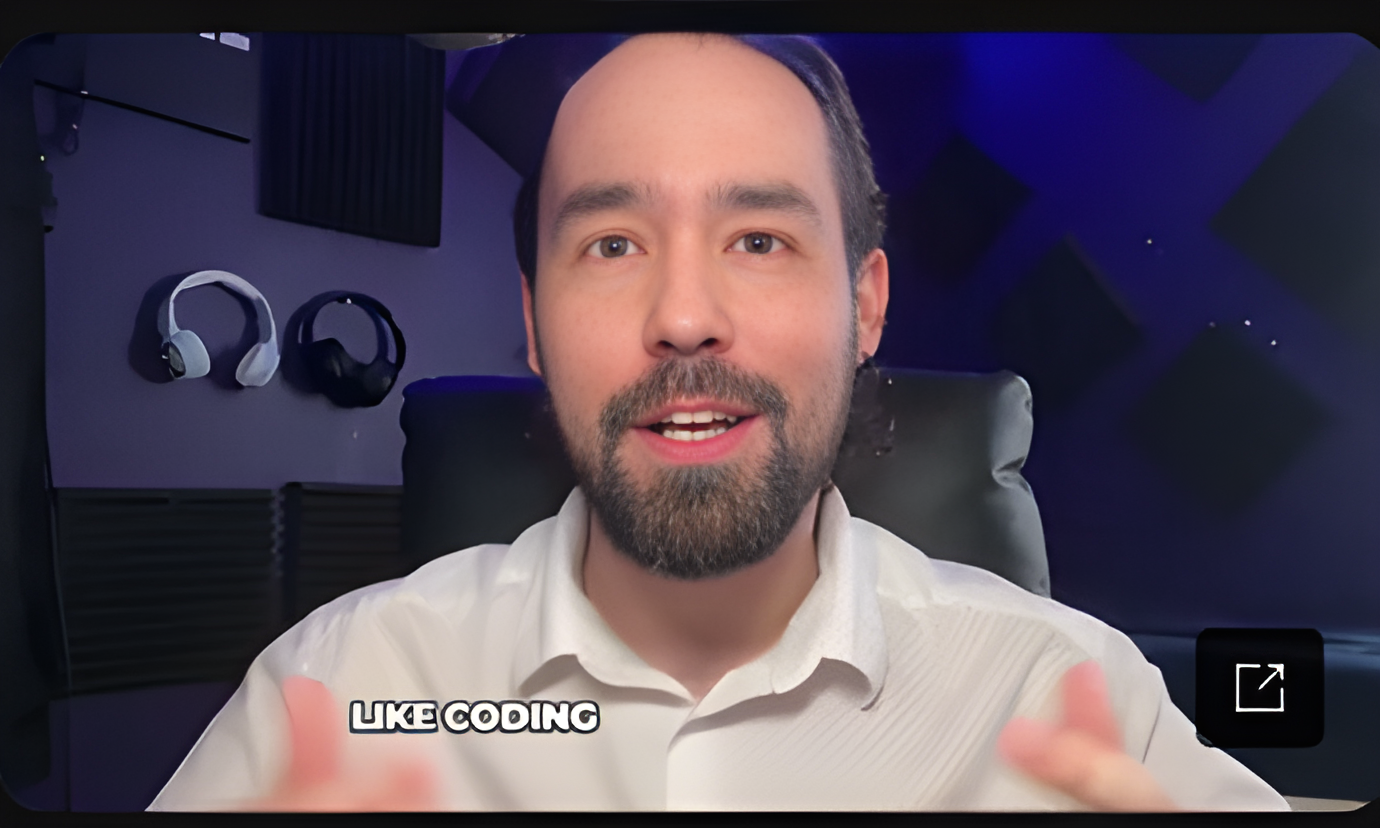

In [1]:
# Instalamos torch y torchvision compatibles
!pip install torch torchvision

# Clonamos el repositorio de Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

# Instalamos las dependencias necesarias
!pip install -q basicsr facexlib gfpgan
!pip install -q -r requirements.txt
!python setup.py develop

# Descargamos los pesos del modelo
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.3.0/RealESRGAN_x4plus.pth -P weights

# Modificación temporal: cambiar importación problemática
!sed -i 's/from torchvision.transforms.functional_tensor import rgb_to_grayscale/from torchvision.transforms.functional import rgb_to_grayscale/g' /usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py

# Importamos las librerías necesarias
from google.colab import files
from PIL import Image
from IPython.display import display
import os

# Solicitamos al usuario que suba una imagen
uploaded = files.upload()

# Obtenemos el nombre del archivo subido
input_image = list(uploaded.keys())[0]

# Creamos el directorio de resultados si no existe
if not os.path.exists('results'):
    os.makedirs('results')

# Aplicamos el modelo de super-resolución
!python inference_realesrgan.py -n RealESRGAN_x4plus -i "{input_image}" --outscale 4 --face_enhance

# Obtenemos el nombre de la imagen de salida
output_image = 'results/' + os.path.splitext(os.path.basename(input_image))[0] + '_out.png'

# Mostramos la imagen resultante
display(Image.open(output_image))
